# Painlevé Comparison

In [76]:
using Distributed
addprocs()
@everywhere using OperatorApproximation
@everywhere using RogueWaveInfiniteNLS
@everywhere using Plots
@everywhere using HDF5
@everywhere using LaTeXStrings

## Preliminary stuff

In [80]:
# Works. Due to the weird rounding of the tick values under the log scale.
mycoefplot(f::BasisExpansion{T};kwargs...) where T = plot(abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)
mycoefplot!(f::BasisExpansion{T};kwargs...) where T = plot!(abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)
mycoefplot!(p,f::BasisExpansion{T};kwargs...) where T = plot!(p,abs.(f.c) .+ eps(); yaxis = :log, yticks = [1, 10e-6, 10e-11, 10e-14, 10e-16], tickfontsize=10, kwargs...)

function mycoefplot(f::BasisExpansion{T};kwargs...) where T <: DirectSum
    p = mycoefplot(f[1];kwargs...)
    for i = 2:length(f)
        mycoefplot!(p,f[i];kwargs...)
    end
    p
end

mycoefplot (generic function with 2 methods)

In [86]:
@everywhere ygrid_exact = collect(-0.2:0.005:0.2)
@everywhere ygrid_dsamp = collect(-0.2:0.01:0.2)
@everywhere function vfromXy(X, y)
    return y/(2^(5/2)*3^(7/6)*X^(1/3)) + VCRIT
end

In [84]:
length(ygrid_dsamp)

41

In [26]:
vfromXy(400,0.2)

0.13741462850620392

## Try for X=Xfixed1

In [154]:
@everywhere Xfixed1 = 4000
@everywhere atest = 1
@everywhere btest = 1
@everywhere two_n = 300
@everywhere vgrid_dsamp1 = vfromXy.(Xfixed1,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver1 = v->rwio_Painleve(Xfixed1,v,atest,btest,two_n)

In [116]:
outnlsPain_ver1, outrhpPain_ver1, outrhp_solverPain_ver1, outUPain_ver1, outu1Pain_ver1, outu2Pain_ver1 = rwio_Painleve_RHP(Xfixed1,VCRIT,atest,btest, two_n);

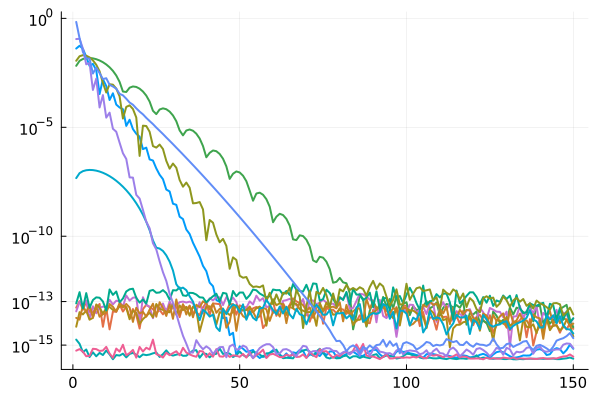

In [117]:
mycptPain_ver1 = mycoefplot(outu1Pain_ver1[1], legend = false, linewidth= 2)

In [94]:
vgrid_dsamp1

41-element Vector{Float64}:
 0.13546456650829566
 0.1354954763572786
 0.13552638620626153
 0.13555729605524447
 0.1355882059042274
 0.13561911575321034
 0.13565002560219327
 0.1356809354511762
 0.13571184530015915
 0.13574275514914208
 0.13577366499812502
 0.13580457484710795
 0.13583548469609086
 ⋮
 0.13636095212880073
 0.13639186197778366
 0.1364227718267666
 0.13645368167574953
 0.13648459152473247
 0.1365155013737154
 0.13654641122269834
 0.13657732107168127
 0.1366082309206642
 0.13663914076964714
 0.13667005061863008
 0.13670096046761301

In [98]:
outpsiPain_ver1 = pmap(compute_rwio_Pain_ver1, vgrid_dsamp1);

In [107]:
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "Xfixed", Xfixed1)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "vgrid_dsamp", vgrid_dsamp1)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "psi", outpsiPain_ver1)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "realpsi", real.(outpsiPain_ver1))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "imagpsi", imag.(outpsiPain_ver1))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_4000.h5", "abspsi", abs.(outpsiPain_ver1))

## Try for fixed X=X2

In [148]:
@everywhere Xfixed2 = 40000
@everywhere atest = 1
@everywhere btest = 1
@everywhere two_n = 300
@everywhere vgrid_dsamp2 = vfromXy.(Xfixed2,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver2 = v->rwio_Painleve(Xfixed2,v,atest,btest,two_n)

In [156]:
outnlsPain_ver2, outrhpPain_ver2, outrhp_solverPain_ver2, outUPain_ver2, outu1Pain_ver2, outu2Pain_ver2 = rwio_Painleve_RHP(Xfixed2,vgrid_dsamp2[1],atest,btest, two_n);

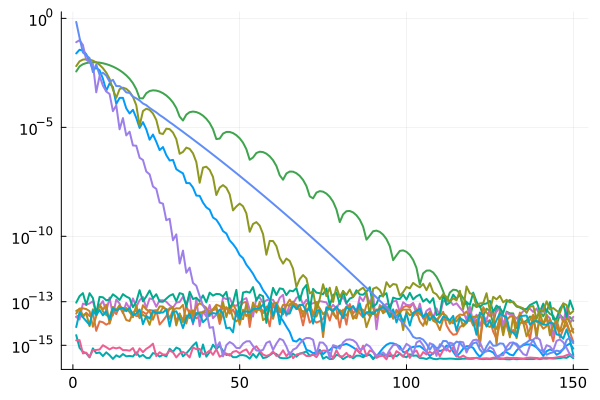

In [157]:
mycptPain_ver2 = mycoefplot(outu1Pain_ver2[1], legend = false, linewidth= 2)

In [160]:
outpsiPain_ver2 = pmap(compute_rwio_Pain_ver2, vgrid_dsamp2);

In [162]:
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "Xfixed", Xfixed2)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "vgrid_dsamp", vgrid_dsamp2)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "psi", outpsiPain_ver2)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "realpsi", real.(outpsiPain_ver2))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "imagpsi", imag.(outpsiPain_ver2))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_40000.h5", "abspsi", abs.(outpsiPain_ver2))

## Try for fixed X=X3

In [173]:
@everywhere Xfixed3 = 400000
@everywhere atest = 1
@everywhere btest = 1
@everywhere two_n = 400
@everywhere vgrid_dsamp3 = vfromXy.(Xfixed3,ygrid_dsamp)
@everywhere compute_rwio_Pain_ver3 = v->rwio_Painleve(Xfixed3,v,atest,btest,two_n)

In [175]:
outnlsPain_ver3, outrhpPain_ver3, outrhp_solverPain_ver3, outUPain_ver3, outu1Pain_ver3, outu2Pain_ver3 = rwio_Painleve_RHP(Xfixed3,vgrid_dsamp3[1],atest,btest, two_n);

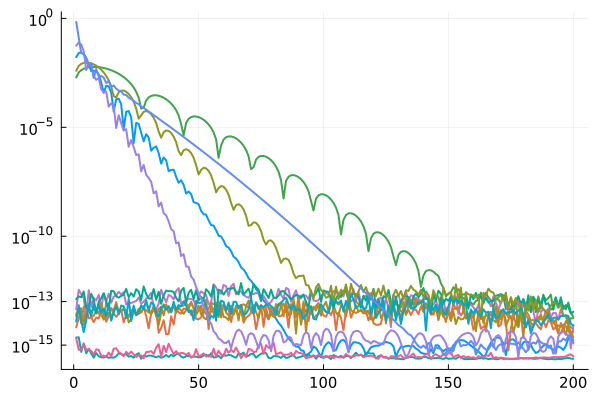

In [181]:
mycptPain_ver3 = mycoefplot(outu1Pain_ver3[1], legend = false, linewidth= 2)

In [183]:
outpsiPain_ver3 = pmap(compute_rwio_Pain_ver3, vgrid_dsamp3);

In [187]:
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "Xfixed", Xfixed3)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "vgrid_dsamp", vgrid_dsamp3)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "ygrid_dsamp", ygrid_dsamp)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "psi", outpsiPain_ver3)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "aval", atest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "bval", btest)
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "realpsi", real.(outpsiPain_ver3))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "imagpsi", imag.(outpsiPain_ver3))
h5write("rwio-OA-a_1-b_1-Pain-vgrid-X_400000.h5", "abspsi", abs.(outpsiPain_ver3))